In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib_venn import venn3
import seaborn as sns

# Leitura e Criação de Dataframe

Aqui a gente recebe o dataset e tranforma ele em um dataframe

In [44]:
df_students = pd.read_csv('../dataset/StudentPerformanceFactors.csv', low_memory=False)
pd.set_option('display.max_columns', None)

# Observando o dataset

Fazendo as primeiras observações sobre o dataset e obtendo informações básicas

In [45]:
df_students.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [46]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [47]:
df_students.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [48]:
df_students.shape

(6607, 20)

Outra verificação importante no tratamento dos dados é a quantidade de dados duplicados do nosso dataset

In [49]:
print(df_students.duplicated().sum())

0


# Análise Univariada - Estatísticas Descritivas

Nesta etapa, vamos explorar as estatísticas descritivas das variáveis numéricas do dataset.  
O objetivo é entender a centralidade (média, mediana), dispersão (desvio padrão, quartis) e valores extremos (mínimo, máximo) de cada variável.

### Perguntas para esta análise:
- Qual é a média de horas estudadas pelos alunos? E como isso varia?
- Existem valores extremos ou fora do esperado nas variáveis contínuas?
- Como se distribui a pontuação média no exame (`Exam_Score`)?

In [50]:
df_students[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Exam_Score']].describe()

,Hours_Studied,Attendance,Sleep_Hours,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000
mean,19.975329,79.977448,7.02906,67.235659
std,5.990594,11.547475,1.46812,3.890456
min,1.000000,60.000000,4.00000,55.000000
25%,16.000000,70.000000,6.00000,65.000000
50%,20.000000,80.000000,7.00000,67.000000
75%,24.000000,90.000000,8.00000,69.000000
max,44.000000,100.000000,10.00000,101.000000


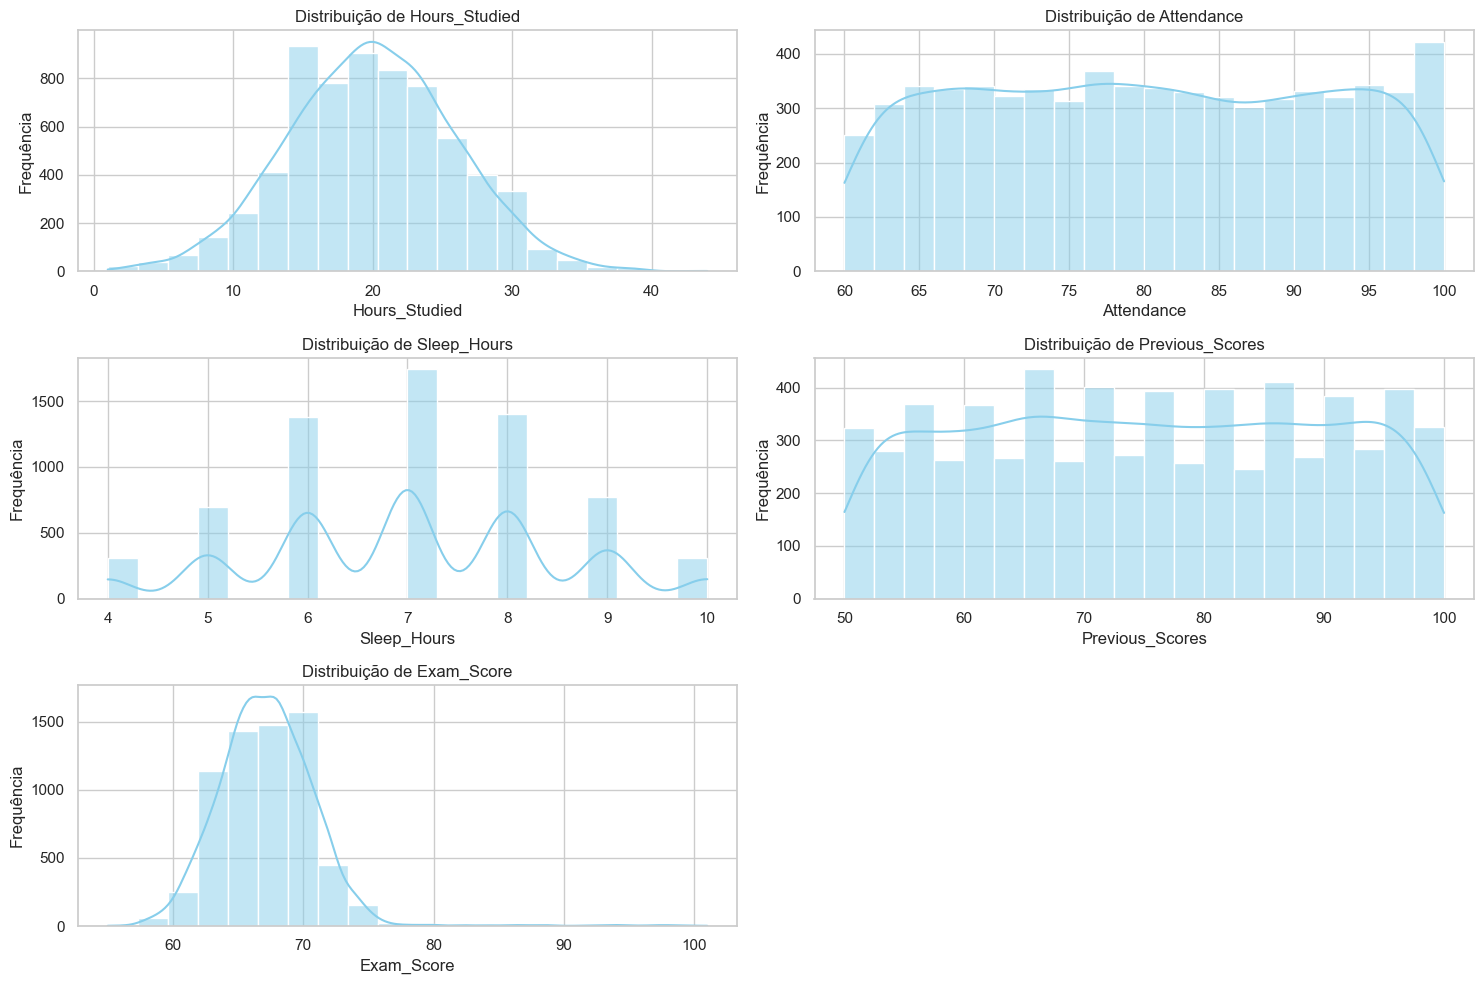

In [51]:
num_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']

plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_students[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

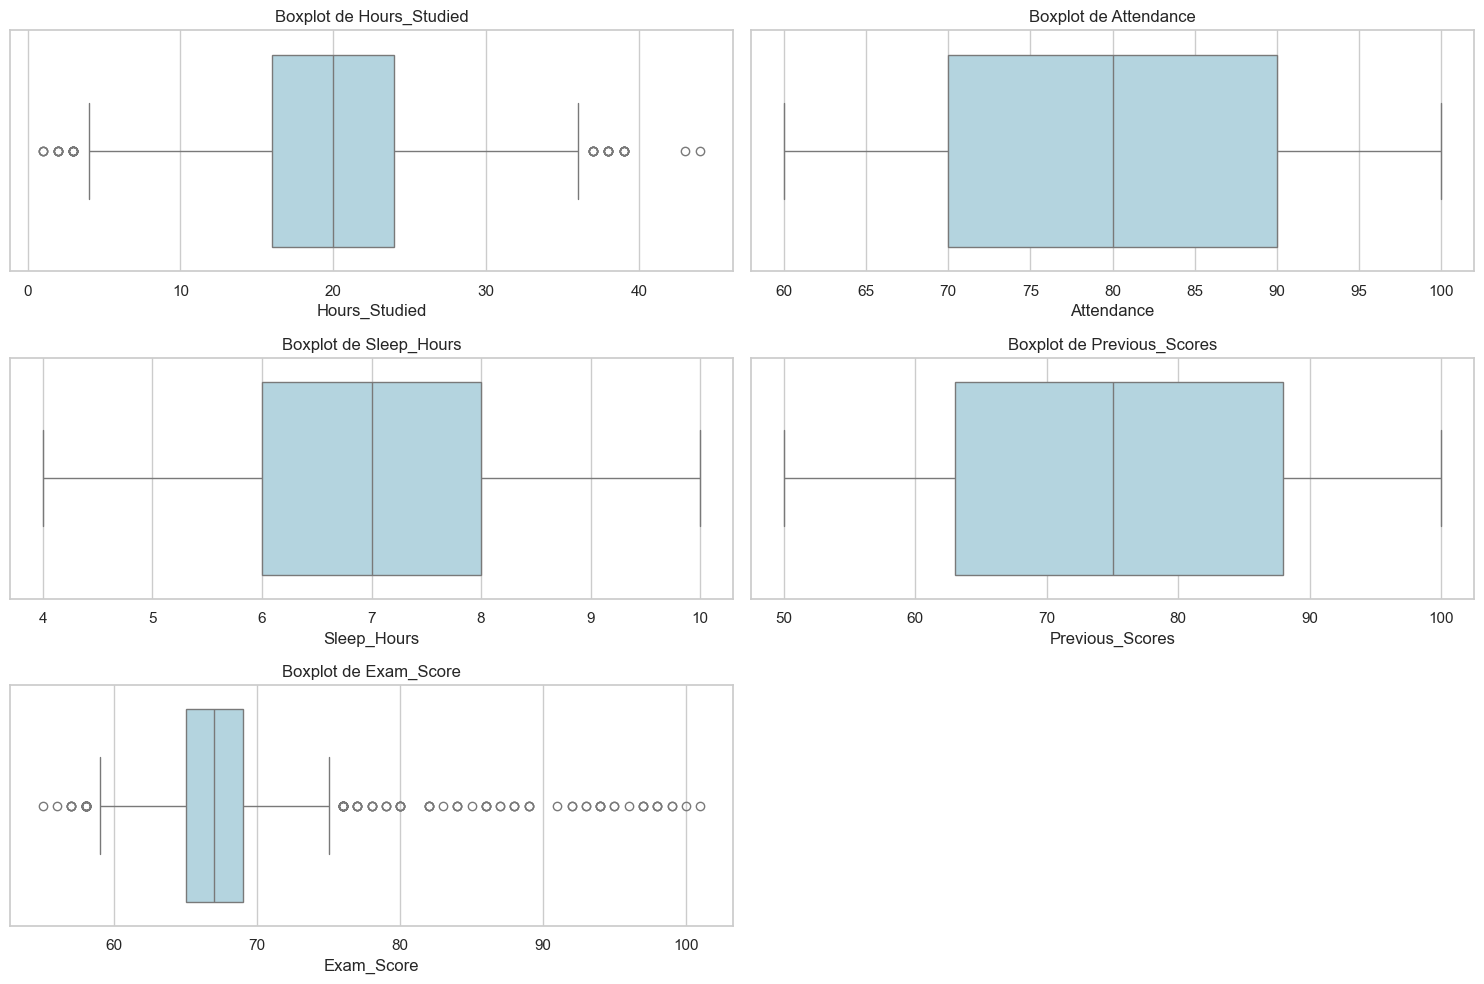

In [52]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_students[var], color='lightblue')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

Aqui podemos observar uma quantidade considerável de outliers na coluna de Exam_Score e também alguns na coluna de Hours_Studied

## Frequência de Variáveis Categóricas

Nesta etapa, analisaremos a frequência das categorias em variáveis qualitativas.  
Isso ajudará a entender:
- Qual categoria é predominante em cada variável?
- Como os dados estão distribuídos em relação a fatores qualitativos como `Gender`, `School_Type`, etc.

### Perguntas para esta análise:
- A maioria dos alunos tem acesso a recursos adequados?
- Qual é o nível de motivação predominante entre os alunos?


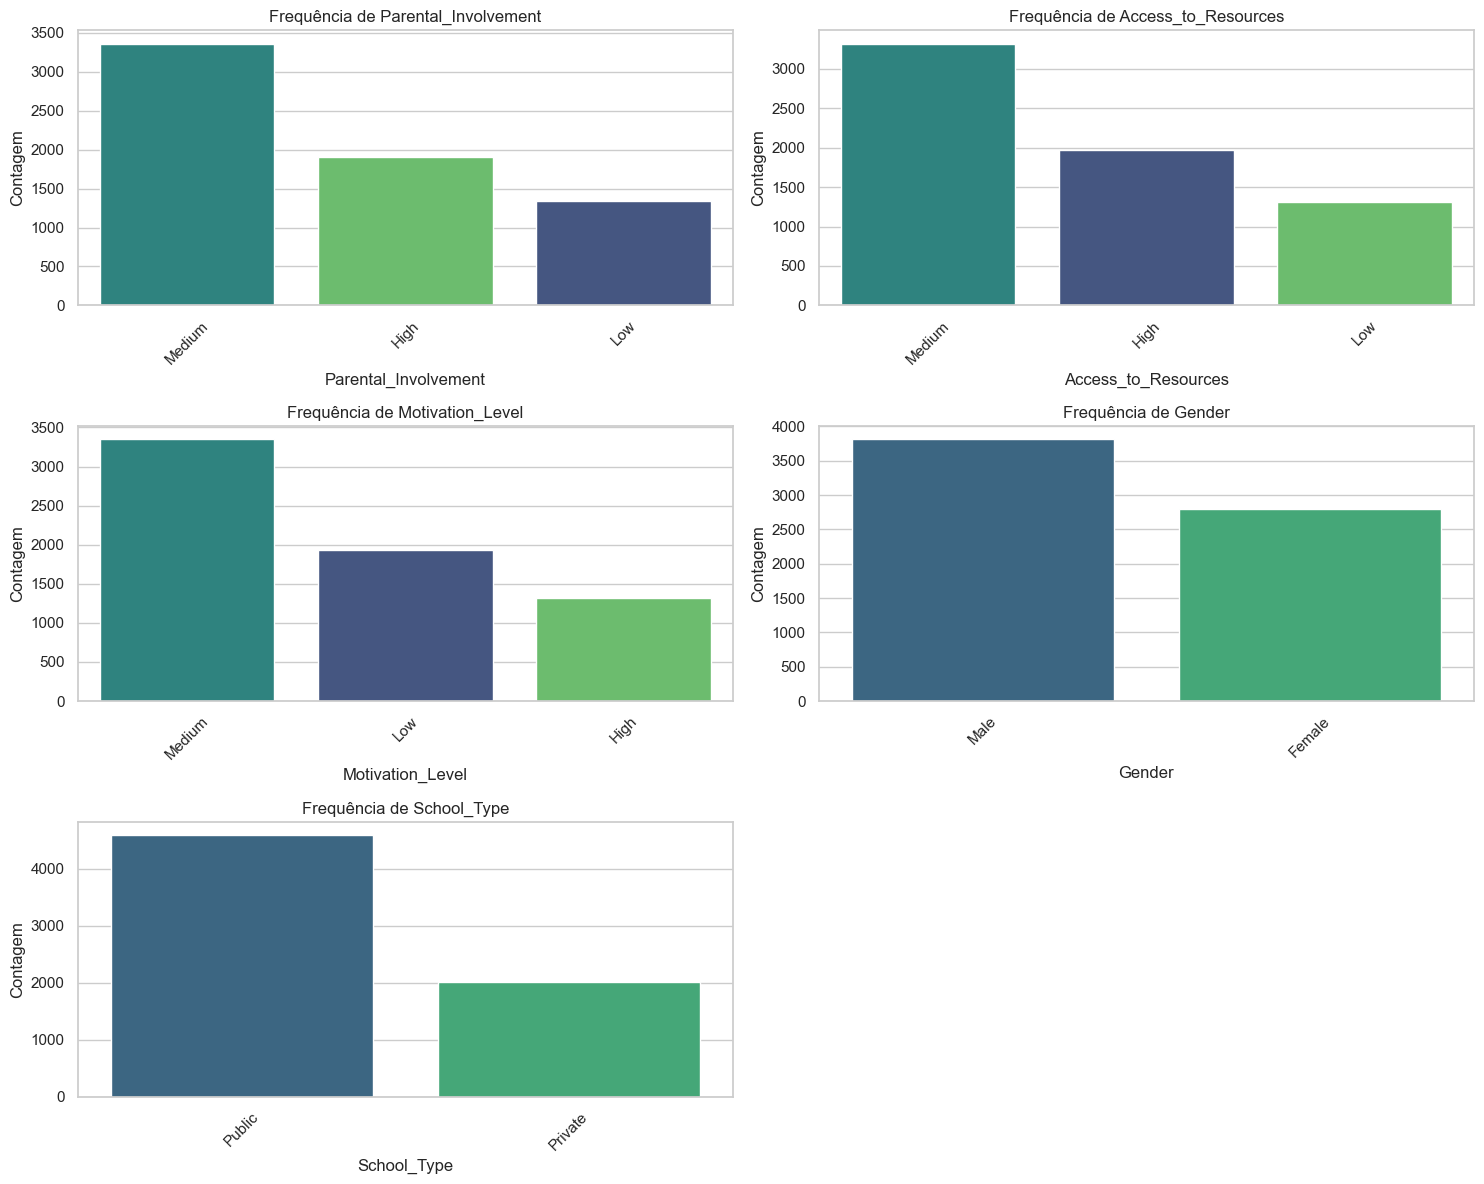

In [58]:
plt.figure(figsize=(15, 12))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df_students, x=var, order=df_students[var].value_counts().index, palette="viridis", hue=var, legend=False)
    plt.title(f'Frequência de {var}')
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

# Análise Multivariada - Correlação entre Variáveis Numéricas

Nesta etapa, vamos investigar a correlação entre as variáveis numéricas do dataset.  
O objetivo é identificar:
- Relações fortes ou fracas entre variáveis contínuas.
- Possíveis preditores do desempenho no exame (`Exam_Score`).


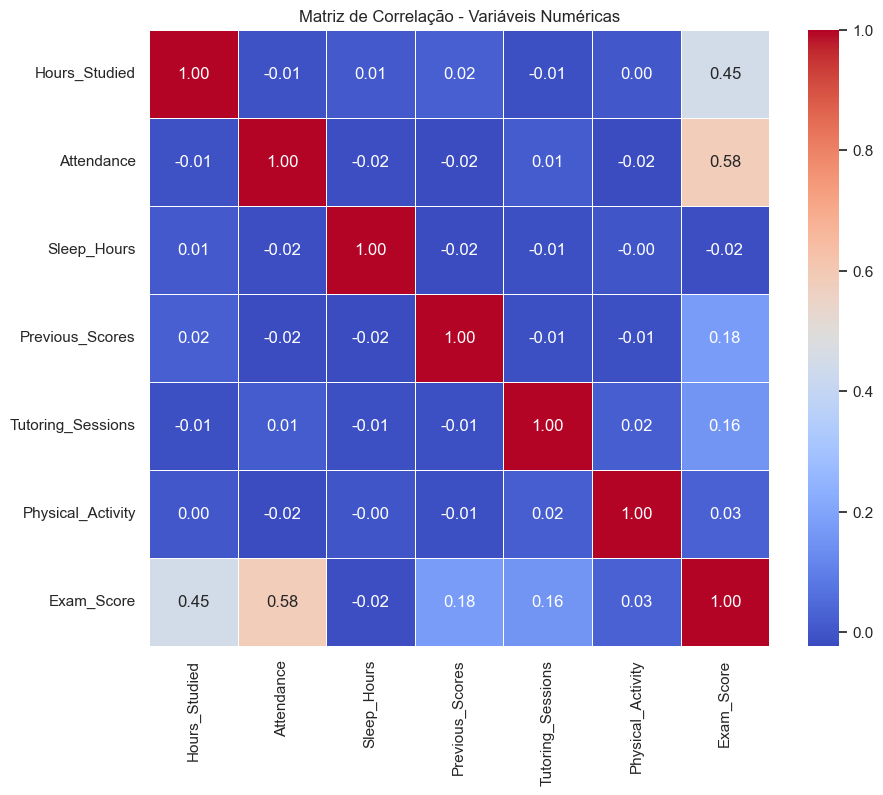

In [61]:
correlation_matrix = df_students[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()


# Ajuste da Análise Multivariada - Exploração de Correlações Significativas

Com base na matriz de correlação, decidimos focar nas seguintes relações:
1. `Attendance` e `Exam_Score`: Apresenta uma correlação moderada positiva (0.58).
2. `Hours_Studied` e `Exam_Score`: Correlação moderada positiva (0.45).
3. `Previous_Scores` e `Exam_Score`: Correlação fraca positiva (0.18).

## Perguntas a serem exploradas:
- Estudantes com maior frequência (`Attendance`) obtêm melhores resultados?
- A relação entre horas estudadas (`Hours_Studied`) e a pontuação varia com o nível de motivação?
- Existe um padrão entre as pontuações prévias e o desempenho final?


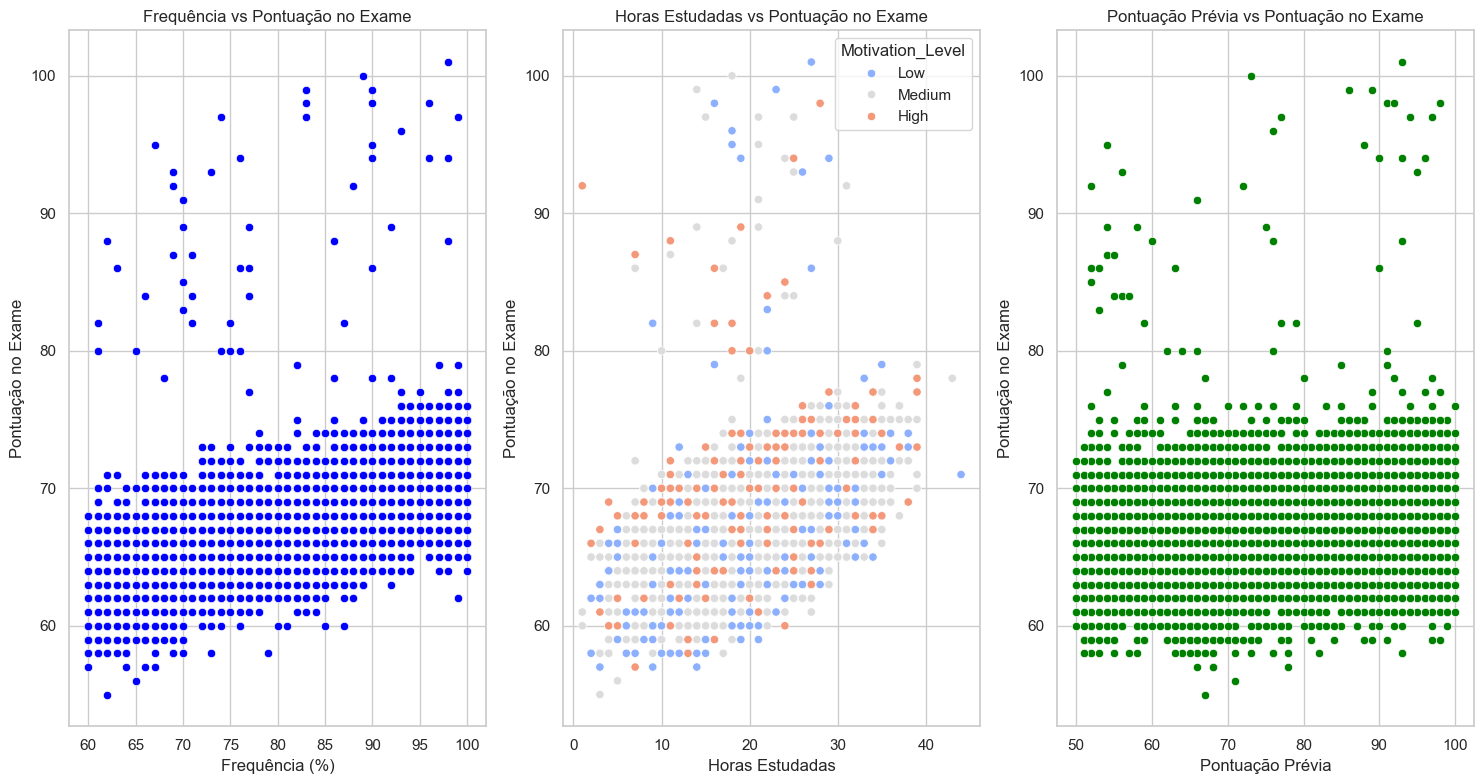

In [62]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_students, x='Attendance', y='Exam_Score', color='blue')
plt.title('Frequência vs Pontuação no Exame')
plt.xlabel('Frequência (%)')
plt.ylabel('Pontuação no Exame')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_students, x='Hours_Studied', y='Exam_Score', hue='Motivation_Level', palette='coolwarm')
plt.title('Horas Estudadas vs Pontuação no Exame')
plt.xlabel('Horas Estudadas')
plt.ylabel('Pontuação no Exame')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_students, x='Previous_Scores', y='Exam_Score', color='green')
plt.title('Pontuação Prévia vs Pontuação no Exame')
plt.xlabel('Pontuação Prévia')
plt.ylabel('Pontuação no Exame')

plt.tight_layout()
plt.show()


Podemos observar que horas estudadas é uma variável importante para o desempenho no exame, vamos dar uma olhada como o nível de motivação impacta nas horas estudadas também:

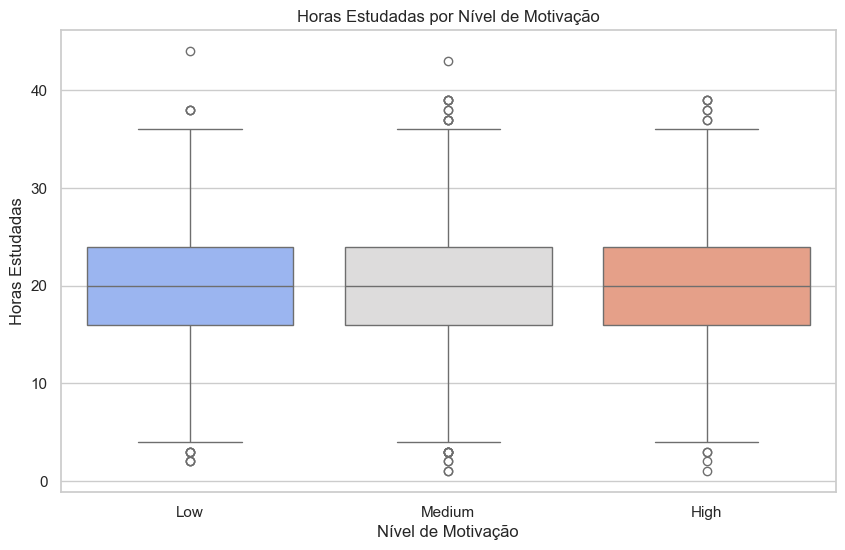

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_students, x='Motivation_Level', y='Hours_Studied', palette='coolwarm', hue='Motivation_Level')
plt.title('Horas Estudadas por Nível de Motivação')
plt.xlabel('Nível de Motivação')
plt.ylabel('Horas Estudadas')
plt.show()


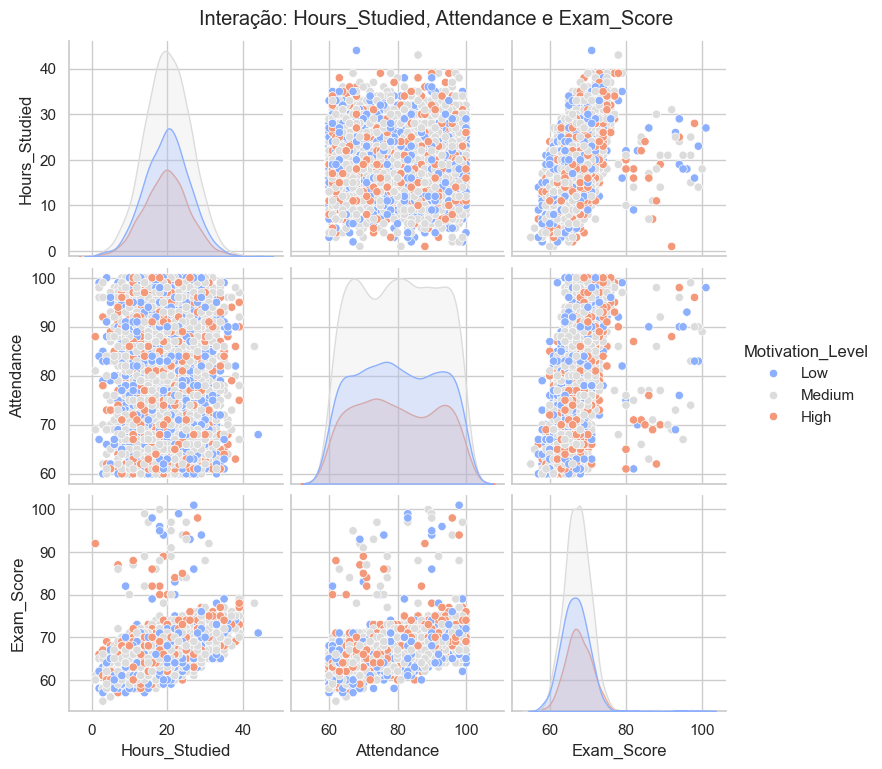

In [68]:
sns.pairplot(df_students, vars=['Hours_Studied', 'Attendance', 'Exam_Score'], hue='Motivation_Level', palette='coolwarm')
plt.suptitle('Interação: Hours_Studied, Attendance e Exam_Score', y=1.02)
plt.show()
